In [24]:
import numpy as np
from qiskit import *
from qiskit import ClassicalRegister, QuantumRegister,QuantumCircuit,execute,Aer
from qiskit.tools.visualization import circuit_drawer,plot_histogram
from qiskit.circuit import Parameter
import numpy as np

theta_range = np.linspace(0, 2 * np.pi, 28)



theta = Parameter('θ')

# Set the circuit qubits
qsize =5

qr = QuantumRegister(qsize,'q')
cr = ClassicalRegister(qsize,'werner')

circuit = QuantumCircuit(qr,cr)

circuit.ry(theta,qr[0])

circuit.barrier()

circuit.cx(qr[0],qr[2])

circuit.barrier()

circuit.h(qr[0])
circuit.cx(qr[2],qr[1])

circuit.barrier()

circuit.x(qr[2])

circuit.barrier()

circuit.ch(qr[2],qr[1])

circuit.barrier()

circuit.x(qr[2])

circuit.barrier()

circuit.ccx(qr[0],qr[2],qr[1])

circuit.barrier()

circuit.x(qr[2])

circuit.barrier()

circuit.ccx(qr[0],qr[2],qr[3])

circuit.barrier()

circuit.ccx(qr[1],qr[2],qr[4])

#measure

for i in range(qsize):
    circuit.measure(qr[i], cr[i])

#bind the parameters

circuits = [circuit.bind_parameters({theta: theta_val})
            for theta_val in theta_range]



#シミュレーターの指定, select the simulator
simulator = BasicAer.get_backend('qasm_simulator')
#量子回路のシミュレーターを使った実行, run the circuit for all the theta values
job = simulator.run(transpile(circuits, simulator))
#測定結果の取り出し
result = job.result()
counts = result.get_counts()

#測定結果のヒストグラム出力, Plot the count results on a histogram
plotgraph = plot_histogram(counts, figsize=(11, 8),bar_labels=False, title="Results Histogram")
plotgraph.savefig("WernerFIG23_hist.png",format="png")



#回路図のプロット, Plot the circuit scheme 
diagram = circuit.draw(output='mpl')
diagram.savefig("WernerFIG23.png",format="png")



In [25]:
counts[4]

{'00100': 212,
 '01101': 208,
 '00001': 105,
 '11111': 195,
 '10110': 202,
 '00010': 102}

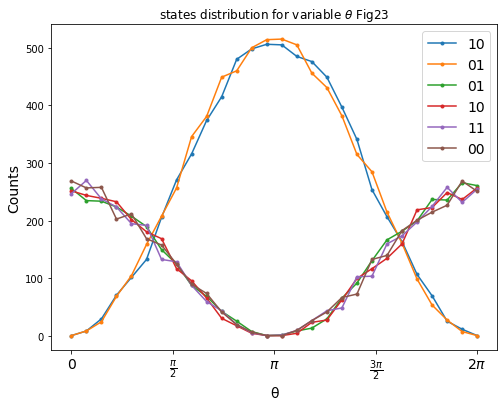

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(theta_range, list(map(lambda c: c.get('00010', 1), counts)), '.-', label='10')
ax.plot(theta_range, list(map(lambda c: c.get('00001', 1), counts)), '.-', label='01')
ax.plot(theta_range, list(map(lambda c: c.get('01101', 1), counts)), '.-', label='01')
ax.plot(theta_range, list(map(lambda c: c.get('10110', 1), counts)), '.-', label='10') 
ax.plot(theta_range, list(map(lambda c: c.get('11111', 1), counts)), '.-', label='11') 
ax.plot(theta_range, list(map(lambda c: c.get('00100', 1), counts)), '.-', label='00')


ax.set_xticks([i * np.pi / 2 for i in range(5)])
ax.set_xticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=14)
ax.set_xlabel('θ', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_title('states distribution for variable '+r'$\theta$'+" Fig23")
ax.legend(fontsize=14)

In [28]:
#Fig6 circuit

qreg_q = QuantumRegister(4,'q')
creg_c = ClassicalRegister(4,'c')
circuit = QuantumCircuit(qreg_q,creg_c)

circuit.ry(theta,qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])
circuit.x(qreg_q[1]).c_if(creg_c, 1)
circuit.h(qreg_q[1]).c_if(creg_c, 0)
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1] ).c_if(creg_c, 1)
circuit.cx(qreg_q[0], qreg_q[2] ).c_if(creg_c, 0)
circuit.cx(qreg_q[1], qreg_q[3] ).c_if(creg_c, 0)
qsize =4

for i in range(qsize):
    circuit.measure(qreg_q[i], creg_c[i])

#bind the parameters

circuits = [circuit.bind_parameters({theta: theta_val})
            for theta_val in theta_range]



#シミュレーターの指定, select the simulator
simulator = BasicAer.get_backend('qasm_simulator')
#量子回路のシミュレーターを使った実行, run the circuit for all the theta values
job = simulator.run(transpile(circuits, simulator))
#測定結果の取り出し
result = job.result()
counts1 = result.get_counts()

#測定結果のヒストグラム出力, Plot the count results on a histogram
plotgraph = plot_histogram(counts1, figsize=(11, 8),bar_labels=False, title="Results Histogram")
plotgraph.savefig("WernerFIG06_hist.png",format="png")



#回路図のプロット, Plot the circuit scheme 
diagram = circuit.draw(output='mpl')
diagram.savefig("WernerFIG06.png",format="png")





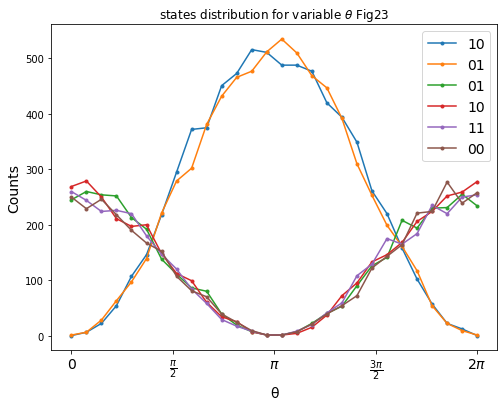

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(theta_range, list(map(lambda c: c.get('0010', 0), counts1)), '.-', label='10')
ax.plot(theta_range, list(map(lambda c: c.get('0001', 1), counts1)), '.-', label='01')
ax.plot(theta_range, list(map(lambda c: c.get('0101', 1), counts1)), '.-', label='01')
ax.plot(theta_range, list(map(lambda c: c.get('1010', 1), counts1)), '.-', label='10') 
ax.plot(theta_range, list(map(lambda c: c.get('1111', 1), counts1)), '.-', label='11') 
ax.plot(theta_range, list(map(lambda c: c.get('0000', 1), counts1)), '.-', label='00')



ax.set_xticks([i * np.pi / 2 for i in range(5)])
ax.set_xticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=14)
ax.set_xlabel('θ', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_title('states distribution for variable '+r'$\theta$'+" Fig06")
ax.legend(fontsize=14)